# Python notebook tips

## General recommendations

#### Notebook structure

- Use Markdown cells to help understand the architecture & logic within the notebook
- Explain context for each part of the program
- Add interpretation of the results and conclusions about actions to take or options to explore

#### Coding style

- Choose Functional Programming over Object Oriented Programming when possible as it is often more readable
- Keep it simple stupid: reduce complexity as much as possible (avoid using complex solutions when simple ones can be implemented)
- DRY: don't repeat yourself (use functions to reuse portions of code for instance)
- Keep configurable info (for example, constants) at the top of the notebook, so that they are easy to change
- Prevent over-configurability ('just in case')
- Be consistent within the code (style, logic...)
- Functions dependent on each other should be close together
- Functions should do only one thing and do it well (separate into multiple functions if needed)
- Avoid deep nested loops (extract loops into separate functions instead)
- Use consistent quotes (single or double) throughout the code

#### Naming & comments

- All objects should be named so that it is easy to understand what they represent throughout the notebook
- Comments should be limited but need to exist: write everything that is not directly understandable from the objects naming (logic behind some code, deliberate choices that might appear incorrect etc.)
- No commented code which reduces readibility, use versioning instead (previously deleted code can be found from older versions)
- Trade-off between providing enough information through comments, versus increasing readibility by limiting code size & avoiding outdated comments
- Use snake_case for functions and methods, PascalCase for class definition, camelCase for class instances, SNAKE_UPPERCASE for constants

#### Docstrings

In [ ]:
def my_function(parameter):
    """
    Does stuff.
    
    Parameters
    ----------
    parameter : type of the parameter
        Parameter description

    Returns
    -------
    type of return

    """

    # do stuff

#### Data types

Main data types are:
- Text: `str` (collection of Unicode characters)
- Numeric: `int` (integer), `float`, `complex`
- Sequence: `list` (mutable collection of objects with same or different types), `tuple` (ordered immutable collection of objects with same or different types), `range` (ordered immutable collection of numbers)
- Dictionary: `dict` (unordered mutable collection of objects with a key-value schema)
- Set: `set` (unordered immutable collection of objects with no duplicates)
- Boolean: `bool` (True or False)

#### Exceptions

In Python, exceptions are raised when the code is syntactically correct (it would otherwise cause a syntax error), but results in an error which changes the normal flow of the program. It is useful to handle exceptions to avoid crashing the program when  some expected but 'abnormal' behaviors happen.  
The exception handling follows the `try: ... except ExceptionType: ...` pattern.

In [1]:
# In this example, we try to get an element of the list which does not exist:
input_integers = [1, 2, 3]
try:
    print(input_integers[10])
except:
    print("An error occurred")

An error occurred


In [2]:
# We can retrieve what exception was caught:
input_integers = [1, 2, 3]
try:
    print(input_integers[10])
except Exception as exception:
    print("An error occurred")
    print(f"Exception: '{exception}' of type: {exception.__class__.__name__}")

An error occurred
Exception: 'list index out of range' of type: IndexError


In [3]:
# It is also possible to catch specific exceptions:
input_integers = [1, 2, 3]
try:
    print(input_integers[10])
except IndexError:
    print("An index error occurred")
# Other example:
input_strings = ["a", "b", "c"]
try:
    print([item + 2 for item in input_strings])
except TypeError:
    print("A type error occurred")

An index error occurred
A type error occurred


In [4]:
# To run some code after having checked for an exception:
input_integers = [1, 2, 3]
try:
    print(input_integers[2])
except Exception:
    print("An error occurred")
else:
    print("No error occurred")
finally:
    print("This is run even if an error occurred")

3
No error occurred
This is run even if an error occurred


In [5]:
# Also possible te raise exceptions to handle abnormal behaviors and display custom messages:
input_integers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
if len(input_integers) < 10:
    raise Exception("Input integer list is too short! Should be more than 10 items")
    # Note: more precise exception types should be favored instead of the general 'Exception' type
else:
    print(input_integers)

Exception: Input integer list is too short! Should be more than 10 items

## Analytics

#### Strings

In [6]:
# Repeat string without looping:
input_string = "bla"
print(input_string * 5)

blablablablabla


In [7]:
# Check if a string only contains digits:
string = "1234"
print(string.isdigit())

True


In [8]:
# Regular expressions:
import re

Regular expressions are sequences of characters that form a search pattern. The `re` module allows to check for a pattern matched in a string using: `match = re.search(pattern, string)`. The search proceeds through the string from start to end, stopping at the first match found. All of the pattern must be matched, but not all of the string. `match.group()`returns the matched text if a match was found (`match` is not None). `findall()` finds all the matches and returns them as a list of strings (can be used on whole files as well).

Basic patterns:
- a, X, 9 indicates ordinary characters to match (characters with special meanings are: `. ^ $ * + ? { [ ] \ | ( )`)
- . matches any single character except newline '\n'
- \w matches a "word" character (single letter or digit or underbar [a-zA-Z0-9_]
- \W matches any non-word character
- \b indicates the boundary between a word and non-word
- \s matches a single whitespace character (space, newline, return, tab, form: [ \n\r\t\f])
- \S matches any non-whitespace character
- \t, \n, \r match respectively tab, newline, return
- \d matches a decimal digit [0-9]
- ^ indicates a match with the first character
- $ indicates a match with the last character
- \ inhibits the "specialness" of a character (example: \. to match a period or \\ to match a slash)
- \+ and * specify a repetition in the pattern (x+: one or more x, x*: zero or more x).  
- [] matches a set of characters (`[abc]` matches `a` or `b` or `c`)
- () defines logical "groups" in the matching text that can be extracted ( `r'([\w.-]+)@([\w.-]+)'`: 2 groups separated by @)

In [9]:
# Example: looking for a sequence of characters
pattern = r'.a+' # it is a good habit to start patterns with a 'r', which indicates a raw string
input_string = "blaaaaa"
match = re.search(pattern, input_string)
if match:
    print(match.group()) 
else:
    print("Pattern not found")

laaaaa


In [10]:
# Example: looking for email addresses (@ character in the string with text on both sides)
pattern = r'([\w.-]+)@([\w.-]+)' 
input_string = "myemailaddress@gmail.com"
match = re.search(pattern, input_string)
if match:
    print(match.group()) 
    print(match.group(1))
    print(match.group(2))
else:
    print("Pattern not found")

myemailaddress@gmail.com
myemailaddress
gmail.com


In [11]:
# Example: looking for all occurences of a sequence of characters
pattern = r'bla'
input_string = "bla ... bla bla! bla"
result = re.findall(pattern, input_string)
print(result)

['bla', 'bla', 'bla', 'bla']


#### Lists & dicts

In [12]:
# Difference between list.sort (sorts the original list) and sorted(list) (returns a new sorted list):
print("Using sorted(list)")
input_list = [9, 4, 6, 3]
sorted_list = sorted(input_list)
print(input_list)
print(sorted_list)

print("Using list.sort")
input_list.sort()
print(input_list) # has been sorted

Using sorted(list)
[9, 4, 6, 3]
[3, 4, 6, 9]
Using list.sort
[3, 4, 6, 9]


In [13]:
# Extract central elements of a list:
input_list = [9, 10, 4, 6, 3]
_, _, *selected_elements, _ = input_list
print(selected_elements)

[4, 6]


In [14]:
# Remove duplicates in a list using set:
input_list_3 = ["a", "b", "c", "c", "d", "a"]
deduplicated_elements = list(set(input_list_3))
print(deduplicated_elements) # caution! sets have no order so the initial order is not garanteed

['a', 'b', 'c', 'd']


In [15]:
# Extract common and different elements between 2 lists using sets:
input_list_1 = [9, 4, 6, 3]
input_list_2 = [8, 5, 4, 6]
common_elements = list(set(input_list_1).intersection(input_list_2))
different_elements = list(set(input_list_1).symmetric_difference(set(input_list_2)))
print(common_elements)
print(different_elements)

[4, 6]
[3, 5, 8, 9]


In [16]:
# Reverse order of a list:
input_list = [1, 2, 3, 4]
reversed_list = list(reversed(input_list))
print(reversed_list)

[4, 3, 2, 1]


In [17]:
# Count number of occurrences of a value within a list:
elements = ["a", "b", "a", "a", "b", "c"]
print(elements.count("a"))

3


In [18]:
# Find the most frequent element in a list:
my_list = ["1", 1, 0, "a", "b", 2, "a", "c", "a"]
print(max(set(my_list), key=my_list.count))

a


In [19]:
# List comprehension is a very powerful tool to handle lists element-wise, using [transform(x) for x in list]:
input_list = ["aaa", "bbb", "ccc", "ddd"]
new_list = [item + "@gmail.com" for item in input_list]
print(new_list)

['aaa@gmail.com', 'bbb@gmail.com', 'ccc@gmail.com', 'ddd@gmail.com']


In [20]:
# Pass list of elements as arguments of a function using *args:
def my_function(item1, item2, item3):
    print(item1, item2, item3)
    
items = ["aaa", "bbb", "ccc"]
my_function(*items)

aaa bbb ccc


In [21]:
# Keep a count of iterations while looping over list or other iterable using enumerate(iterable, start=0):
input_list = ["aaa", "bbb", "ccc", "ddd"]
enum_list = enumerate(input_list)
for element in enum_list:
    print(element)

(0, 'aaa')
(1, 'bbb')
(2, 'ccc')
(3, 'ddd')


In [22]:
# Convert 2 lists into dict:
list_1, list_2 = [1, 2, 3], ["a", "b", "c"]
my_dict = dict(zip(list_1, list_2))
print(my_dict)

{1: 'a', 2: 'b', 3: 'c'}


In [23]:
# Swap keys and values of a dictionary:
input_dict = {"a": 1, "b": 2, "c": 3}
reversed_dict = {val: key for key, val in input_dict.items()}
print(reversed_dict)

{1: 'a', 2: 'b', 3: 'c'}


In [24]:
# Merge 2 dictionaries (caution, will keep last value only if common key found):
dict_1 = {"a": "cde", "b": 2, "c": 3}
dict_2 = {"c": 10, "d": "abc", "e": 30}
new_dict = {**dict_1, **dict_2}
print(new_dict)

{'a': 'cde', 'b': 2, 'c': 10, 'd': 'abc', 'e': 30}


#### Dataframes

In [25]:
import pandas as pd

In [ ]:
# Read data from csv or txt file (for txt file -> sep="\t"):
csv_file_path = "C:/Users/.../file.csv"
df_csv = pd.read_csv(csv_file_path, sep=",", header=True, index=False, encoding="latin-1", low_memory=False)

In [ ]:
# Read data from json file:
json_file_path = "C:/Users/.../file.json"
df_json = pd.read_json(json_file_path, encoding="utf-8")

In [ ]:
# Read data from sql query:
import pyodbc
connection_hadoop=pyodbc.connect("dsn=Impala_Opendata;principal=impala/opendatam02f.bi3.local@REALM", autocommit=True)
df_query = pd.read_sql("""select a, b, c from dataset.table""", connection_hadoop)

In [ ]:
# Write data to csv:
csv_file_path = "C:/Users/.../file.csv"
df.to_csv(csv_file_path, sep=",", header=True, index=True, index_label=None, encoding="utf-8", decimal=".")

In [ ]:
# Write data to Excel file:
excel_file_path = "C:/Users/.../file.xlsx"
writer = pd.ExcelWriter(excel_file_path, engine="xlsxwriter")
df.to_excel(writer, sheet_name="results", index=False)

In [26]:
# Join dataframes (see https://pandas.pydata.org/docs/user_guide/merging.html):
df_1 = pd.DataFrame({"key": [1, 2, 3, 4], "col_1": [10, 3, 2, 5]})
df_2 = pd.DataFrame({"key": [1, 2, 4], "col_2": ["a", "b", "c"]})
df_3 = pd.DataFrame({"key": [1, 2, 4, 5, 6], "col_3": ["i", "j", "k", "l", 'm']})

df_concat = pd.concat([df_1, df_2, df_3], axis=0, join="outer", ignore_index=False) # same columns (or rows if axis=1)
df_merge = pd.merge(df_1, df_2, how="left", on="key", sort=True) # add validate="one_to_one" to check keys are unique
df_join = df_1.join(df_2, how="left", lsuffix="_1", rsuffix="_2", sort=False) # join on index
display(df_concat, df_merge, df_join)

,key,col_1,col_2,col_3
0,1,10.0,NaN,NaN
1,2,3.0,NaN,NaN
2,3,2.0,NaN,NaN
3,4,5.0,NaN,NaN
0,1,NaN,a,NaN
1,2,NaN,b,NaN
2,4,NaN,c,NaN
0,1,NaN,NaN,i
1,2,NaN,NaN,j
2,4,NaN,NaN,k


,key,col_1,col_2
0,1,10,a
1,2,3,b
2,3,2,NaN
3,4,5,c


,key_1,col_1,key_2,col_2
0,1,10,1.0,a
1,2,3,2.0,b
2,3,2,4.0,c
3,4,5,NaN,NaN


In [28]:
# Merge several dataframes in one step:
from functools import reduce

df_1 = pd.DataFrame({"key": [1, 2, 3, 4], "col_1": [10, 3, 2, 5]})
df_2 = pd.DataFrame({"key": [1, 2, 4], "col_2": ["a", "b", "c"]})
df_3 = pd.DataFrame({"key": [1, 2, 4, 5, 6], "col_3": ["i", "j", "k", "l", 'm']})

df_merged = reduce(lambda left, right: pd.merge(left, right, on=["key"], how='outer'), [df_1, df_2, df_3])
display(df_merged)

,key,col_1,col_2,col_3
0,1,10.0,a,i
1,2,3.0,b,j
2,3,2.0,NaN,NaN
3,4,5.0,c,k
4,5,NaN,NaN,l
5,6,NaN,NaN,m


In [29]:
# Get all values concatenated into a string by group (example -> list of products):
df = pd.DataFrame({"group": [1, 1, 2, 2, 3, 3, 3], "value": ["a", "b", "a", "b", "a", "b", "c"]})
df_group = df.sort_values(["group","value"]).groupby("group")["value"].apply(lambda string: ', '.join(string)).reset_index()
display(df, df_group)

,group,value
0,1,a
1,1,b
2,2,a
3,2,b
4,3,a
5,3,b
6,3,c


,group,value
0,1,"a, b"
1,2,"a, b"
2,3,"a, b, c"


In [32]:
# Compute cross tabulation (by default, frequency table of 2 or more groups):
df = pd.DataFrame({"group_1": [1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2], 
                   "group_2": ["a", "a", "a", "b", "a", "b", "a", "a", "a", "b", "a", "a"], 
                   "value": [10, 20, 30, 100, 200, 300, 15, 25, 35, 150, 250, 350]})
df_frequency = pd.crosstab(index=df["group_1"], columns=df["group_2"])
df_sum = pd.crosstab(index=df["group_1"], columns=df["group_2"], values=df["value"], aggfunc=sum, margins=True)
display(df_frequency, df_sum)

group_2,a,b
group_1,,
1,5,1
2,4,2


group_2,a,b,All
group_1,,,
1,495,300,795
2,440,250,690
All,935,550,1485


In [33]:
# Get sum of a column by groups using pivot_table:
df = pd.DataFrame({"index": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                   "group_1": [1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2], 
                   "group_2": ["a", "a", "a", "b", "a", "b", "a", "a", "a", "b", "a", "a"], 
                   "value": [10, 20, 30, 100, 200, 300, 15, 25, 35, 150, 250, 350]})
df_group = pd.DataFrame(df.groupby(["group_1", "group_2"])["value"].sum().rename("sum")).reset_index()
df_pivot = pd.pivot_table(df_group, values="sum", index="group_1", columns="group_2", aggfunc="sum", fill_value=0, dropna=False)
display(df_pivot)

group_2,a,b
group_1,,
1,495,300
2,440,250


In [34]:
# Get count of each value of a column by groups using pivot_table:
df = pd.DataFrame({"index": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                   "group_1": [1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2], 
                   "group_2": ["a", "a", "a", "b", "a", "b", "a", "a", "a", "b", "a", "a"], 
                   "value": ["val_1", "val_2", "val_1", "val_2", "val_1", "val_3", "val_3", "val_1", "val_1", "val_1", "val_2", "val_2"]})
df_group = pd.DataFrame(df.groupby(["group_1", "group_2"])["value"].value_counts().rename("count")).reset_index()
df_pivot = pd.pivot_table(df_group, values="count", index=["group_1", "group_2"], columns="value", aggfunc="max", fill_value=0, dropna=False)
display(df_pivot)

value            val_1  val_2  val_3
group_1 group_2                     
1       a            2      2      1
        b            0      0      1
2       a            3      1      0
        b            1      1      0

#### Functions

In [35]:
# Lambda functions are small anonymous functions (defined without a name):
example_function = lambda x: x * 2 if x % 2 == 0 else x * 3
print(example_function(3))

9


In [36]:
# Define a function that can take as many parameters as wanted:
def my_function(*arguments):
    return f"Arguments: {str(list(arguments))}"
print(my_function(1, 2, 3))

Arguments: [1, 2, 3]


#### Plots

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [40]:
df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "var_1": [1000, 1506, 3030, 2076, 1550, 4802, 4003, 598, 909, 230, 345, 9878],
    "var_2": [0.1, 0.3, 1.5, 5.5, 0.4, 0.3, 2.2, 1.8, 3.5, 0.3, 1.2, 4.5],
    "var_3": ["a", "a", "a", "a", "a", "a", "b", "b", "b", "b", "b", "b"],
    "var_4": ["i", "j", "k", "i", "j", "k", "i", "j", "k", "i", "j", "k"],
    "var_5": ["2000-01-01", "2000-02-01", "2000-03-01", "2000-04-01", "2000-05-01", "2000-06-01", 
              "2000-07-01", "2000-08-01", "2000-09-01", "2000-10-01", "2000-11-01", "2000-12-01"],
    "var_6": ["k", "i", "j", "j", "j", "k", "k", "i", "k", "i", "k", "k"],
})

df_distr = pd.DataFrame({
    "level": ["low", "medium", "high"],
    "group_1": [20, 60, 20],
    "group_2": [10, 4, 5],
    "group_3": [2, 40, 10]
})

df_pct = df_distr.set_index("level").div(df_distr.set_index("level").sum(axis=0), axis=1).transpose()\
    .reset_index().rename({"index":"level"}, axis=1)
display(df_pct)

level,level,low,medium,high
0,group_1,0.200000,0.600000,0.200000
1,group_2,0.526316,0.210526,0.263158
2,group_3,0.038462,0.769231,0.192308


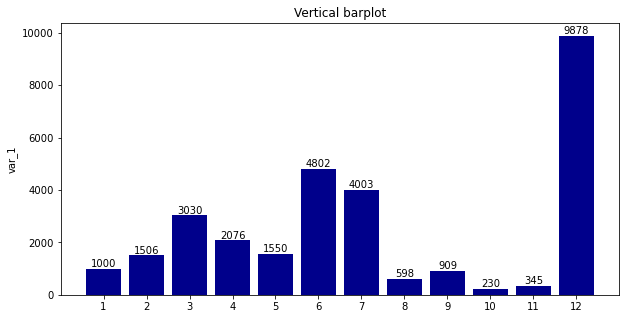

In [41]:
# Vertical barplot
yvalues = df.var_1
xvalues = df.id
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
bar1 = ax.bar(xvalues, yvalues, align="center", color="darkblue")
ax.set_xticks(np.arange(len(xvalues))+1, labels=xvalues)
ax.set_ylabel("var_1")
ax.set_title("Vertical barplot")
ax.bar_label(bar1)
plt.show()

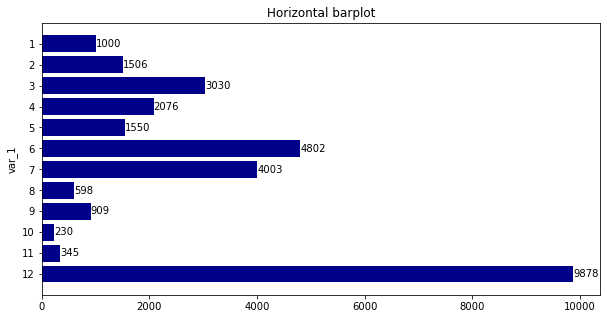

In [42]:
# Horizontal barplot
yvalues = df.var_1
xvalues = df.id
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
bar1 = ax.barh(xvalues, yvalues, align="center", color="darkblue")
ax.invert_yaxis()
ax.set_yticks(np.arange(len(xvalues))+1, labels=xvalues)
ax.set_ylabel("var_1")
ax.set_title("Horizontal barplot")
ax.bar_label(bar1)
plt.show()

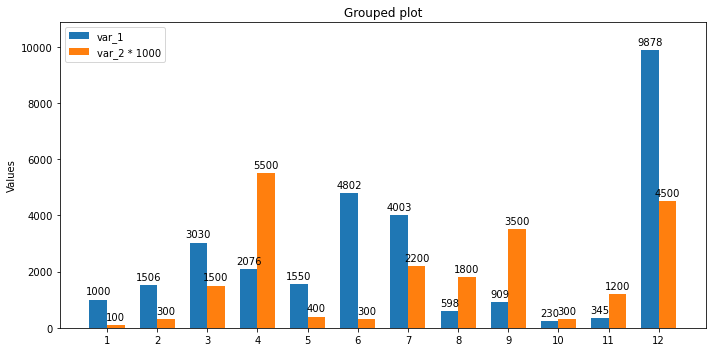

In [43]:
# Grouped plot
yvalues_1 = df.var_1
yvalues_2 = df.var_2 * 1000
xvalues = df.id 
label_pos = np.arange(len(df.id))
max_val = max(df.var_1.max(), df.var_2.max()*1000)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.set_ylim([0, max_val * 1.1])
bar1 = ax.bar(label_pos - width/2, yvalues_1, width, label="var_1")
bar2 = ax.bar(label_pos + width/2, yvalues_2, width, label="var_2 * 1000")
ax.set_ylabel("Values")
ax.set_title("Grouped plot")
ax.set_xticks(label_pos, xvalues)
ax.legend()
ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
fig.tight_layout()
plt.show()

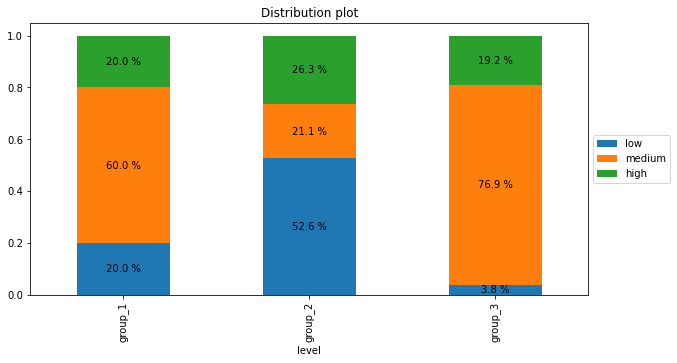

In [45]:
# Distribution plot with percentages
ax = df_pct.plot.bar(x="level", stacked=True, title="Distribution plot",)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f} %'.format(round(height,3)*100), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.show()

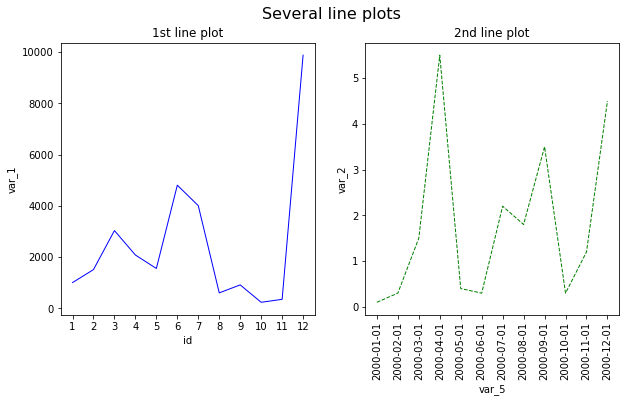

In [46]:
# Several line plots
yvalues_1 = df.var_1
xvalues_1 = df.id 
label_pos_1 = np.arange(len(df.id))+1 # numerical xaxis
yvalues_2 = df.var_2
xvalues_2 = df.var_5
label_pos_2 = np.arange(len(df.var_5)) # categorical xaxis

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(xvalues_1, yvalues_1, linewidth=1, color="blue")
ax1.set_title("1st line plot")
ax1.set_xticks(label_pos_1, xvalues_1)
ax1.set_xlabel("id")
ax1.set_ylabel("var_1")

ax2.plot(xvalues_2, yvalues_2, linewidth=1, color="green", linestyle="dashed")
ax2.set_title("2nd line plot")
ax2.set_xticks(label_pos_2, xvalues_2, rotation = 90)
ax2.set_xlabel("var_5")
ax2.set_ylabel("var_2")
fig.suptitle("Several line plots", fontsize=16)
plt.show()

#### Others

In [47]:
# Assign multiple elements in 1 row:
a, b, c, d = 1, 2, 3, 4
print(a, b, c, d)

1 2 3 4


In [48]:
# Swap values between objects:
variable_1 = "a"
variable_2 = "b"
variable_1, variable_2 = variable_2, variable_1
print(variable_1, variable_2)

b a


In [49]:
# Multiple conditions in single if statement:
variable_1 = 2
variable_2 = 10
variable_3 = "a"

my_conditions = [variable_1 % 2 == 0, variable_2 > 5, variable_3 != "b"]

if all(my_conditions):
    print("Passed all the conditions")
else:
    print("At least one condition is not passed")

Passed all the conditions


In [50]:
# Put if condition on 1 line:
is_condition = True
x = "yes" if is_condition else "no"
print(x)

yes


In [51]:
# Check memory usage of an object:
import sys
example_1 = "A string"
example_2 = 12345
print(sys.getsizeof(example_1), sys.getsizeof(example_2))

57 28


In [52]:
# Get execution time:
import time
start_time = time.time()
# do stuff
print("Hello!")
print("--- %s seconds ---" % (time.time() - start_time))

Hello!
--- 0.0 seconds ---


In [53]:
# Map, reduce, filter (see https://book.pythontips.com/en/latest/map_filter.html)
items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items)) # apply function to all items in list
print(items, "-->", squared)

number_list = range(-5, 5)
less_than_zero = list(filter(lambda x: x < 0, number_list)) # get list of elements for which a function returns true
print(list(number_list), "-->", less_than_zero)

from functools import reduce
input_list = [1, 2, 3, 4]
product = reduce((lambda x, y: x * y), input_list) # perform computation on a list and return the result
print(input_list, "-->", product)

[1, 2, 3, 4, 5] --> [1, 4, 9, 16, 25]
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4] --> [-5, -4, -3, -2, -1]
[1, 2, 3, 4] --> 24


## Datascience

#### Control group

In [ ]:
# Create train and test sets for model evaluation:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Algorithms

In [ ]:
# Classification models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

LogisticRegression(penalty="l2", dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
                   random_state=42, solver="lbfgs", max_iter=100, warm_start=False, n_jobs=None, l1_ratio=None)

SVC(C=1.0, kernel="rbf", degree=3, gamma="scale", coef0=0.0, shrinking=True, probability=False, tol=0.001, class_weight=None, 
    max_iter=-1, decision_function_shape="ovr", break_ties=False, random_state=42)

KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", 
                     metric_params=None, n_jobs=None)

DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features="sqrt", max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       bootstrap=True, oob_score=False, n_jobs=None, random_state=42, warm_start=False, class_weight=None, 
                       ccp_alpha=0.0, max_samples=None)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, 
                   algorithm="SAMME.R", random_state=42)

GradientBoostingClassifier(loss="log_loss", learning_rate=0.1, n_estimators=100, subsample=1.0, criterion="friedman_mse", 
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                           min_impurity_decrease=0.0, init=None, random_state=42, max_features=None, max_leaf_nodes=None, 
                           warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
# Regression models:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

LinearRegression(fit_intercept=True, n_jobs=None, positive=False)

ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, 
           random_state=42, selection="cyclic")

SVR(kernel="rbf", degree=3, gamma="scale", coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, max_iter=-1)

KNeighborsRegressor(n_neighbors=5, *, weights="uniform", algorithm="auto", leaf_size=30, p=2, 
                    metric="minkowski", metric_params=None, n_jobs=None)

DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, 
                      min_impurity_decrease=0.0, ccp_alpha=0.0)

RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      bootstrap=True, oob_score=False, n_jobs=None, random_state=42, warm_start=False, ccp_alpha=0.0, 
                      max_samples=None)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=1.0, loss="linear", 
                  random_state=42)

GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100, subsample=1.0, criterion="friedman_mse", 
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                          min_impurity_decrease=0.0, init=None, random_state=42, max_features=None, alpha=0.9, 
                          max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                          tol=0.0001, ccp_alpha=0.0)

In [ ]:
# Unsupervised models:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=42, copy_x=True, 
       algorithm="lloyd")

DBSCAN(eps=0.5, min_samples=5, metric="euclidean", metric_params=None, algorithm="auto", leaf_size=30, p=None, n_jobs=None)

PCA(n_components=None, copy=True, whiten=False, svd_solver="auto", tol=0.0, iterated_power="auto", n_oversamples=10, 
    power_iteration_normalizer="auto", random_state=42)

#### Performance

In [ ]:
# Classification metrics (see https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics):
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss)

def assess_classification_model_performance(labels, predicted_labels, predicted_probs):
    """
    Assess performance for a classification model.

    More precisely, compute accuracy, precision, recall, F1 score, ROC AUC and log loss.

    Parameters
    ----------
    labels : pd.Series
        actual event information
    predicted_labels : pd.Series
        predicted event information
    predicted_probs : pd.Series
        predicted probabilities of event

    Returns
    -------
    dict

    """
    return {
        "accuracy_score": accuracy_score(labels, predicted_labels),
        "precision_score": precision_score(labels, predicted_labels),
        "recall_score": recall_score(labels, predicted_labels),
        "f1_score": f1_score(labels, predicted_labels),
        "roc_auc_score": roc_auc_score(labels, predicted_probs),
        "log_loss": log_loss(labels, predicted_probs)
    }

In [ ]:
# Regression metrics (see https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics):
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, max_error)

def assess_regression_model_performance(values, predicted_valuess):
    """
    Assess performance for a regression model.

    More precisely, compute  R2 score, MAE, MSE, median absolute error and max error.

    Parameters
    ----------
    values : pd.Series
        actual feature values
    predicted_values : pd.Series
        predicted feature values

    Returns
    -------
    dict

    """
    return {
        "r2_score": r2_score(values, predicted_values),
        "MAE": mean_absolute_error(values, predicted_values),
        "MSE": mean_squared_error(values, predicted_values),
        "median_absolute_error": median_absolute_error(values, predicted_values),
        "max_error": max_error(values, predicted_values)
    }

In [ ]:
# Dummy classifier/regressor for model comparison:
from sklearn.dummy import DummyClassifier, DummyRegressor

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test) # by default, returns mean accuracy over labels

reg = DummyRegressor(strategy="mean")
reg.fit(X_train, y_train)
reg.predict(X_test)
reg.score(X_test, y_test) # by default, returns R2 score

In [ ]:
# Determine best model using GridSearchCV:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
models = GridSearchCV(svc, parameters)
models.fit(iris.data, iris.target)

print(f"Best model: {models.best_estimator_}, with score: {round(models.best_score_, 3)}")
print("\nGridSearch cross-validation results:")
print({key: models.cv_results_.get(key) for key in ["params", "mean_test_score", "rank_test_score"]})

#### Pipelines and features transformation

In [ ]:
# Define some custom transformations with sklearn transformers:
import pandas as pd
import numpy as np
import json
import enum
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

A_ASCII_CODE = ord("A")

class Aggregations(enum.Enum):
    Sum = "sum"
    Mean = "mean"
    Count = "count"


class ColumnType(enum.Enum):
    Float = "float"
    Int = "int"
    Category = "category"
    Bool = "bool"


class JsonToDataframeTransformer(BaseEstimator, TransformerMixin):
    """
    Read a json file containing the selected features.

    Attributes
    ----------

    """

    def fit(self, X, y=None):
        return self

    def transform(self, input_json_data):
        X_ = pd.DataFrame.from_records(json.loads(input_json_data))
        return X_

    
class BucketizerTransformer(BaseEstimator, TransformerMixin):
    """
    Turn a numerical variable into a categorical one by splitting it
    according to a list of thresholds.

    Attributes
    ----------
    input_col : str
        column containing int/float data
    output_col : str
        column in which the result is stored
    splits : iterable of numeric
        list of int/float that are used as thresholds to split
        the input variable and transform it into a categorical variable

    """

    def __init__(self, input_col, output_col, splits):
        self.input_col = input_col
        self.output_col = output_col
        self.splits = splits

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X_ = X.copy()
        for index in range(len(self.splits)):
            if index == 0:
                X_.loc[X_[self.input_col] <= self.splits[index],
                       self.output_col] = f"{chr(A_ASCII_CODE + index)}." \
                                          f" <={self.splits[index]}"
            else:
                X_.loc[(X_[self.input_col] > self.splits[index - 1]) &
                       (X_[self.input_col] <= self.splits[index]),
                       self.output_col] = f"{chr(A_ASCII_CODE + index)}. " \
                                          f"({self.splits[index - 1]}," \
                                          f"{self.splits[index]}]"
        X_.loc[X_[self.input_col] > self.splits[len(self.splits) - 1],
               self.output_col] = f"{chr(A_ASCII_CODE + len(self.splits))}. " \
                                  f">{self.splits[len(self.splits) - 1]}"
        X_[self.output_col] = X_[self.output_col].fillna("Unknown")
        return X_


class AggregationTransformer(BaseEstimator, TransformerMixin):
    """
    Aggregate a list of columns, with either Sum, Mean or Count, received as input.

    Attributes
    ----------
    input_cols : iterable of str
        list of columns to be aggregated
    output_col : str
        column in which the result is stored
    agg_type : Enum Aggregation
        type of aggregation to be applied (as Enum custom class
        called Aggregations)

    """

    def __init__(self, input_cols, output_col, agg_type):
        self.input_cols = input_cols
        self.output_col = output_col
        self.agg_type = agg_type

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X_ = X.copy()
        if self.agg_type == Aggregations.Sum:
            X_[self.input_cols] = X_[self.input_cols]. \
                fillna(0).astype(float)
            X_[self.output_col] = X_[self.input_cols].sum(axis=1)
        elif self.agg_type == Aggregations.Mean:
            X_[self.output_col] = X_[self.input_cols].mean(axis=1)
        elif self.agg_type == Aggregations.Count:
            X_[self.output_col] = np.count_nonzero(X_[self.input_cols],
                                                   axis=1)
        return X_


class MissingValuesTransformer(BaseEstimator, TransformerMixin):
    """
    Replace the missing values for a list of columns having the same type.

    Attributes
    ----------
    input_cols : iterable of str
        list of columns containing the missing values
    cols_type : Enum ColumnType
        type of the columns given as input (taken from an Enum
        custom class called ColumnType); depending on the type (Int, Float,
        Bool, Category), the input columns are filled with 0, 0.0 or Unknown

    """

    def __init__(self, input_cols, cols_type):
        self.input_cols = input_cols
        self.cols_type = cols_type

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X_ = X.copy()
        for col in self.input_cols:
            if self.cols_type == ColumnType.Float:
                X_[col] = X_[col].fillna(0)
                X_[col] = X_[col].astype(float)
            elif self.cols_type == ColumnType.Int:
                X_[col] = X_[col].fillna(0)
                X_[col] = X_[col].astype(int)
            elif self.cols_type == ColumnType.Bool:
                X_[col] = X_[col].astype(str).str.lower() == "true"
            elif self.cols_type == ColumnType.Category:
                X_[col] = X_[col].fillna("Unknown")
                X_[col] = X_[col].astype("category")
        return X_


class CountValueTransformer(BaseEstimator, TransformerMixin):
    """
    Count the occurrence of a value in the list of columns given as input.

    Attributes
    ----------
    input_cols : iterable of str
        list of columns in which the value is searched
    val : numeric or str
        the value to be counted
    output_col : str
        column in which the result is stored

    """

    def __init__(self, input_cols, val, output_col):
        self.input_cols = input_cols
        self.val = val
        self.output_col = output_col

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X_ = X.copy()
        X_[self.output_col] = (X_[self.input_cols].isin([self.val])). \
            sum(axis=1)
        return X_


class ComputeRateTransformer(BaseEstimator, TransformerMixin):
    """
    Divide the two columns received as input (create a rate variable).

    Attributes
    ----------
    input_cols : iterable of str
        list of 2 columns to be divided
    output_col : str
        column in which the result is stored

    """

    def __init__(self, input_cols, output_col):
        self.input_cols = input_cols
        self.output_col = output_col

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X_ = X.copy()
        X_.loc[X[self.input_cols[1]] > 0, self.output_col] = \
            X_.loc[X[self.input_cols[1]] > 0, self.input_cols[0]] / \
            X_.loc[X[self.input_cols[1]] > 0, self.input_cols[1]]
        X_[self.output_col].fillna(0, inplace=True)
        return X_


class OneHotEncodingTransformer(BaseEstimator, TransformerMixin):
    """
    Transform a categorical column into a set of binary columns.

    More precisely, create one feature per unique value of the categorical
    column, excluding the selected value.

    Attributes
    ----------
    input_col : str
        column containing categorical data
    drop_value : str
        input column value to exclude while creating the binary columns

    """

    def __init__(self, input_col, drop_value):
        self.input_col = input_col
        self.drop_value = drop_value

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X_ = X.copy()
        if self.drop_value in X[self.input_col].unique():
            encoder = OneHotEncoder(drop=[self.drop_value])
        else:
            encoder = OneHotEncoder(drop=None)
        encoded = encoder.fit_transform(X_[[self.input_col]]).toarray()
        columns = [normalize_string(i) for i in
                   encoder.get_feature_names([self.input_col + "_encoded"])]
        encoded_df = pd.DataFrame(data=encoded, index=X_.index,
                                  columns=columns)
        return X_.join(encoded_df.astype(int))


class CustomRandomForestClassifier(RandomForestClassifier):
    """
    Create a customized RandomForest classifier.

    Attributes
    ----------

    """

    def fit(self, X, Y=None, **fit_params):
        return super().fit(X, y=Y, **fit_params)

    def transform(self, X):
        return X

    def predict(self, X):
        return super().predict_proba(X)[:, 1]

In [ ]:
# Create a pipeline to fit transform features:
from sklearn.pipeline import Pipeline

step_name_0 = "input_preparation"
transformation_0 = [(step_name_0, JsonToDataframeTransformer())]

step_name_1 = "transformation_1"
transformation_1 = [(f"{step_name_1}_1", MissingValuesTransformer(["sales_amount", "upsell_amount"], ColumnType.Float)),
                    (f"{step_name_1}_2", BucketizerTransformer("sales_amount", "sales_amount_class", [10, 500, 1000, 2000, 5000])),
                    (f"{step_name_1}_3", OneHotEncodingTransformer("sales_amount_class", "D. (1000,2000]")),
                    (f"{step_name_1}_4", BucketizerTransformer("upsell_amount", "upsell_amount_class", [-1000, -50, 50, 1000])),
                    (f'{step_name_1}_5', OneHotEncodingTransformer("upsell_amount_class", "D. (50,1000]"))]

step_name_2 = "transformation_2"
transformation_2 = [(f"{step_name_2}_1", MissingValuesTransformer(["is_vertical_commerce"], ColumnType.Bool)),
                    (f'{step_name_2}_2', BooleanToIntegerTransformer(["is_vertical_commerce"]))]

step_name_3 = "model_creation"
FIT_PARAMS = {"_classifier_": "RandomForestClassifier",
              "n_estimators": 200,
              "criterion": "gini",
              "max_depth": 30,
              "min_samples_split": 100,
              "max_features": None,
              "bootstrap": True,
              "random_state": RANDOM_STATE}

fit_params = {k: v for k, v in FIT_PARAMS.items() if k != "_classifier_"}
transformation_3 = [(step_name_3, CustomRandomForestClassifier(**fit_params))]


def fit_transform_pipeline(features_fit, labels_fit, features):
    """
    Fit pipeline on fitting features and transform all features.

    Parameters
    ----------
    features_fit : pd.DataFrame
        DataFrame with the features on which to fit the pipeline
    labels_fit : pd.Series
        DataFrame with the target event on which to fit the pipeline
    features : pd.DataFrame
        DataFrame to transform

    Returns
    -------
    pipeline object, pd.DataFrame (transformed data)

    """

    steps = transformation_0 + transformation_1 + transformation_2 + transformation_3
    pipe = Pipeline(steps=steps)
    pipe.fit_transform(features_fit.to_json(orient="records"), labels_fit)
    features_trans = pipe.transform(features.to_json(orient="records"))
    return pipe, features_trans

# Apply pipeline and getting predictions:
pipe, features_trans = fit_transform_pipeline(features_train_sampled, labels_train_sampled, features)
scores = pd.Series(pipe.predict(features.to_json(orient="records")))